<a href="https://colab.research.google.com/github/jolly-io/EDA_On_US_Domestic_Flights/blob/main/Understanding_Airlines_Delays_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding United States Domestic Airlines Flight Delays.


In this project , I aim to understand the performance of airlines by investigating the relationship betwen airports and carriers and the variables that impact the efficiency of their operations. I undertake this by leveraging the techniques of descriptive and exploratory analysis explored in most Introductory Python course.  

My dataset is a population of 201,664 records of United States domestic flights in January 1-15 of 2015, available from the bureau of transportation statistics of the department of transportation.

### Description of Variables

* FlightDate:	    Flight Date (yyyymmdd)
* UniqueCarrier:	Unique Carrier Code
* FlightNum:	    Flight Number (Flights on different days may have the same flight number)
* Origin:	       Origin Airport
* Dest:	          Destination Airport
* ArrDelay:	     Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
* Cancelled:	    Cancelled Flight Indicator (1=Yes)
* CarrierDelay:	 Carrier Delay, in Minutes
* WeatherDelay:	 Weather Delay, in Minutes
* NASDelay:	     National Air System Delay, in Minutes
* SecurityDelay:	Security Delay, in Minutes
* LateAircraftDelay:	Late Aircraft Delay, in Minutes
* Actualelapsedtime: flight travel time



### Carrier Codes

* AA:	American Airlines Inc.
* OO:	SkyWest Airlines Inc.
* DL:	Delta Air Lines Inc.
* NK:	Spirit Air Lines
* HA:	Hawaiian Airlines Inc.
* WN:	Southwest Airlines Co.
* B6:	JetBlue Airways
* US:	US Airways Inc.
* AS:	Alaska Airlines Inc.
* MQ:	Envoy Air
* F9:	Frontier Airlines Inc.
* VX:	Virgin America
* EV:	ExpressJet Airlines Inc.
* UA:	United Air Lines Inc.

##  Important Note About NAN values:  

At inital glance, the delay types columns appear to have a lot of NAN values. This is normal and to be expected. An NAN value means that a given variable did not account for the delay of the flight for that day.

In [ ]:
#@title
# do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import library and packages
import seaborn as sns
sns.set(style='white')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset into Colab
from google.colab import files
files.upload();

Saving us_domestic_flights.csv to us_domestic_flights.csv


In [ ]:
# Read into pandas DataFrame
flights = pd.read_csv('us_domestic_flights.csv')

In [ ]:
flights.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0


In [ ]:
# Create an column of boolean values showing for delay and ontime flights
flights['delayed'] = flights['arr_delay'].apply(lambda x: x > 0)

In [ ]:
# Get dimension of the data Frame
flights.shape

(201664, 15)

In [ ]:
# Get Summary of DataFrame
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   flight_date          201664 non-null  object 
 1   unique_carrier       201664 non-null  object 
 2   flight_num           201664 non-null  float64
 3   origin               201664 non-null  object 
 4   dest                 201664 non-null  object 
 5   arr_delay            196347 non-null  float64
 6   cancelled            201664 non-null  float64
 7   distance             201664 non-null  float64
 8   carrier_delay        58533 non-null   float64
 9   weather_delay        58533 non-null   float64
 10  late_aircraft_delay  58533 non-null   float64
 11  nas_delay            58533 non-null   float64
 12  security_delay       58533 non-null   float64
 13  actual_elapsed_time  196347 non-null  float64
 14  delayed              201664 non-null  bool   
dtypes: bool(1), float

In [ ]:
# Get a summary statistics Variables in the DataFrame
flights.describe()

,flight_num,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
count,201664.000000,196347.000000,201664.000000,201664.000000,58533.000000,58533.000000,58533.000000,58533.000000,58533.000000,196347.000000
mean,2266.933474,13.933337,0.023757,807.395123,17.829532,3.389934,25.700784,13.909179,0.062204,138.990114
std,1809.840822,46.525143,0.152293,598.324111,43.529473,20.950499,43.084977,26.850565,1.581336,74.485044
min,1.000000,-74.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,763.000000,-10.000000,0.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000
50%,1730.000000,1.000000,0.000000,643.000000,3.000000,0.000000,9.000000,3.000000,0.000000,121.000000
75%,3483.000000,20.000000,0.000000,1050.000000,19.000000,0.000000,34.000000,18.000000,0.000000,172.000000
max,7438.000000,1444.000000,1.000000,4983.000000,1444.000000,938.000000,938.000000,824.000000,104.000000,724.000000


# Question 1: What Variables Constitutes Most Airline Flights Delays ?

Airlines are known to have regular delays, but most passengers are not aware that there are multiple delay factors. If the department of transportation and airlines understand what factors impact delays the most, they may be able to allocate the more capital to improve the situation.

Before I proceed, it's a good idea to get a summary statistics of flights delays.

In [ ]:
# Isolate summary statistics for flight delay
flights['carrier_delay'].describe()

count    58533.000000
mean        17.829532
std         43.529473
min          0.000000
25%          0.000000
50%          3.000000
75%         19.000000
max       1444.000000
Name: carrier_delay, dtype: float64

From the summary statistics above, I notice that the average flight delay is just under 14 minutes. But the max delay is a full day (1444 minutes). With a standard deviation of almost 50 minutes, I can tell that there is high variability in flight delays.  

Next, I want to see what flight had the longest delay and the variable that was responsible for the delay.

In [ ]:
# Sort delay to find the longest flight delay
flights.sort_values(by='arr_delay', ascending=False)[:5]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
11073,2015-01-11 00:00:00,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0,True
10214,2015-01-13 00:00:00,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0,True
12430,2015-01-03 00:00:00,AA,1677.0,MEM,DFW,1384.0,0.0,432.0,1380.0,0.0,0.0,4.0,0.0,104.0,True
8443,2015-01-04 00:00:00,AA,1279.0,OMA,DFW,1237.0,0.0,583.0,1222.0,0.0,15.0,0.0,0.0,102.0,True
10328,2015-01-05 00:00:00,AA,1495.0,EGE,DFW,1187.0,0.0,721.0,1019.0,0.0,168.0,0.0,0.0,127.0,True


I can see immediately from the above subset DataFrame that the flight that had the longest delay
was from Austin-Bergstrom International airport(AUS) in Austin Texas to Dallas~Fort Worth International airport(DFW) still in Texas.   

What is more interesting is that I notice that the delay was not any of the variables that I would have expected like a weather delay. It was a CARRIER DELAY(carrier_delay) by American Airlines. Is this a pattern or a one-off event for American?

Now I am curious to know what variables really contribute to airline delays the most. What were the most common contributors to delay, did the planes freeze such since January was winter ?

To find out, I pivot the date and type of delays, summing the number of minutes of each type of delay below.

In [ ]:
# Pivot the date and type of delay, aggregating minutes of delay
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = flights.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03 00:00:00,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04 00:00:00,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05 00:00:00,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06 00:00:00,92383.0,156971.0,94990.0,372.0,26299.0
2015-01-07 00:00:00,66708.0,96301.0,64607.0,165.0,17763.0
2015-01-08 00:00:00,74861.0,101703.0,70006.0,510.0,33015.0
2015-01-09 00:00:00,80123.0,112193.0,50703.0,182.0,15076.0
2015-01-10 00:00:00,50056.0,34610.0,13958.0,116.0,5683.0


The results in the table above are the sum of minutes delayed, by type of delay, and by day.

To answer our core question of what contributes the most to flight delays, I create a stacked accumulation of counts using an area plot, to illustrate the relative contribution of the delays.

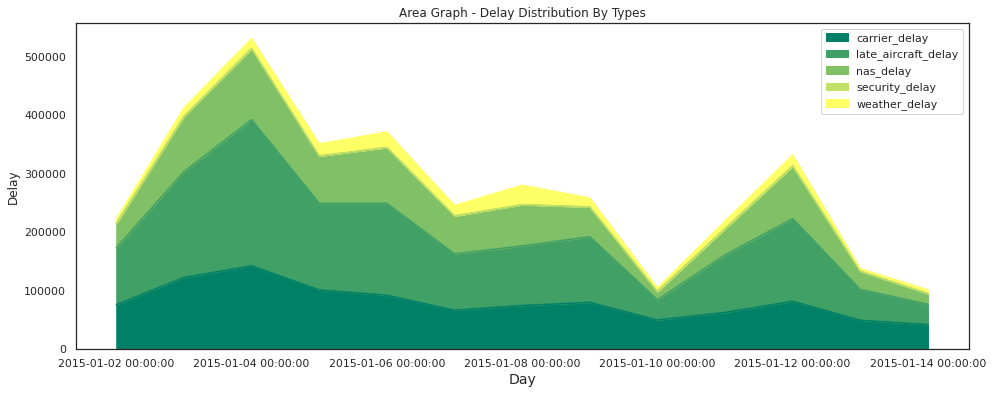

In [ ]:
# Area Plot
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='summer')
plt.title('Area Graph - Delay Distribution By Types')
plt.xlabel('Day', fontsize=14),
plt.ylabel('Delay');

I can see from the area visualization that carrier delay and late aircraft arrival constitutes the most of airline delays, the general perception might be that weather largely impact flight delays.

I want to be sure that this observation is consistent with an alternative visualization. So I will implement the data in another visual.

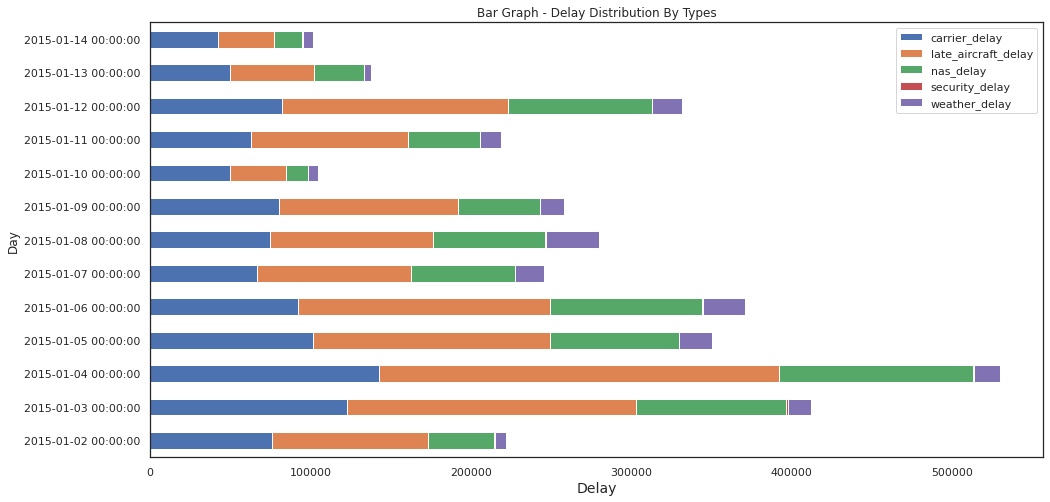

In [ ]:
# Stacked Barplot of delay types
flight_delays_by_day.plot(kind='barh', stacked=True, figsize=[16,8])
plt.title('Bar Graph - Delay Distribution By Types')
plt.xlabel('Delay', fontsize=14),
plt.ylabel('Day');

The stacked bar visualization above is consistent with the observation that late aircraft delay and carrier delay contributes to most airline delays.

# Question 2: Which Airports Are the Least Reliable for Passengers  ?

Airports are complex locations with factors that operate in many intersecting ways that impact the efficiency of operations of airlines and their flights. Airports suffer from a number of challenges including weather, runway design, congestion and even in rare bizzare cases, animal factors like birds and stray dogs on the run-ways have impacted on-time flight departures and arrivals.
In this question, I investigate how airport compare as no one wants to get stuck in an airport on their way to an important trip. Passengers should know which airports to avoid.



To start, I take a look at the top 20 highest volume airports by origin. Origin is departure airports.

In [ ]:
# Get the airport with the largest volume of flights
top_volume = flights['origin'].value_counts()[:20]
top_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

Next, I create a bolean index filtering for the flight records that originated ('orgin') in the top 20 highest volume airports.

In [ ]:
# Create a list of the airport code names of top volume airports
top_volume_airports_names = top_volume.index.tolist()
print(top_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


In [ ]:
# Filter dataframe for records that originate from the top volume airports
top_volume_airports = flights[flights['origin'].isin(top_volume_airports_names)]
top_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True


Now that I have a dataframe of flights originating from the high volume airports, I want to know which of these airports had the longest delays for that day. I create a pivot table that pivots the flight date on the airport, where the values are the mean of the flight delays for that day.

In [ ]:
top_volume_airports_pivots = top_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
top_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


Now, I want to get the summary statistics for each airport, specifically to see the mean and dispersion of delays.

In [ ]:
#summary statistics
top_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


It is quite challenging to compare airports by simple looking at a big table of numbers. So I'll group the records for each airport and overlay them in a histogram below.

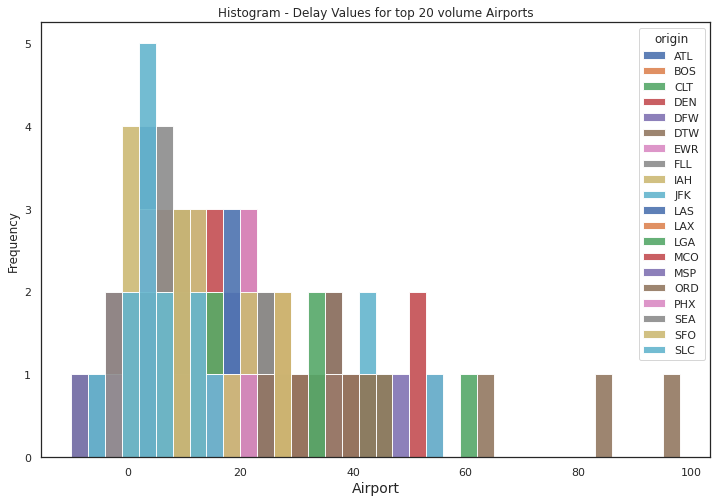

In [ ]:
import numpy as np

airport_bins = np.arange(-10,100,3)
top_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,8], alpha=.9,  legend=True);
plt.title('Histogram - Delay Values for top 20 volume Airports')
plt.xlabel('Airport', fontsize=14),
plt.ylabel('Frequency');

The histogram shows us an overlayed distribution of delays by airports. But this is still tough to read and understand. I find an alternative visualization that more clearly captures the message. In this case, a boxplot will come in handy.

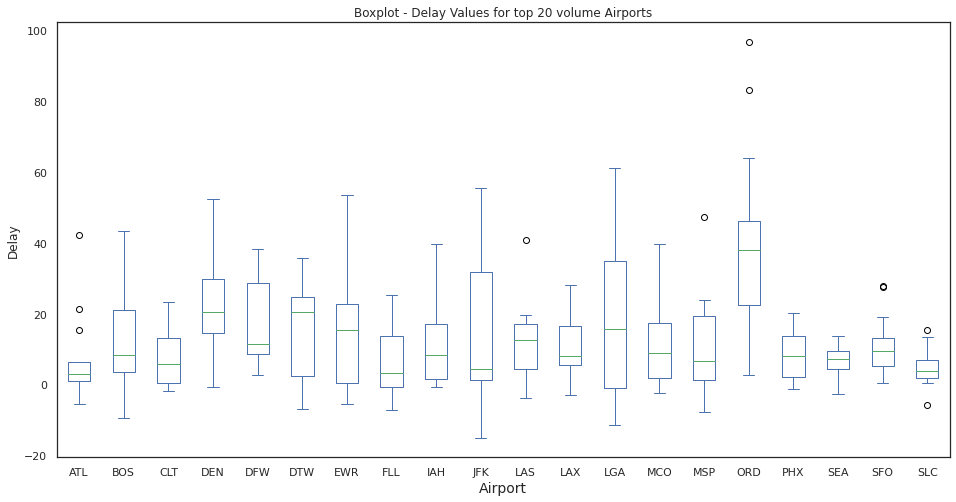

In [ ]:
top_volume_airports_pivots = top_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
top_volume_airports_pivots.plot(kind='box', figsize=[16,8])
plt.title('Boxplot - Delay Values for top 20 volume Airports')
plt.xlabel('Airport', fontsize=14),
plt.ylabel('Delay');

As can be seen on the boxplot, airports like JFK had a significant dispersion of delays, while LGA was evenly distributed around the most frequent average delay. Chicago airport (ORD), however was almost twice as delayed all the time, compared to every other high volume airport.

To answer our question, which is the least reliable airport, I can now say one will almost certainly experience delays if flying out of Chicago International Airport, based on this 2015 data. So if possible, avoid connecting flights in Chicago.